## Improving Student Performance prediction using Decision Trees
#### Presented by: Mario A. Santana Lopez, Ulises Mendez Martinez

### Student Alcohol Consumption Dataset

#### Data Source (Citation):
**Using Data Mining To Predict Secondary School Student Alcohol Consumption.**

*Fabio Pagnotta, Hossain Mohammad Amran* 

Department of Computer Science,University of Camerino

#### Data Set was consulted at:
* **Url:** https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

### 0.- Libraries needed 
First of all we need to install/load the packages required 

In [31]:
# install.packages("rminer", repos = "http://cran.us.r-project.org") #run it once to install missing libraries
# install.packages('randomForest', repos = "http://cran.us.r-project.org")
library(rpart)        # recursion trees 
library(party)        # needed for other trees
library(rminer)       # used in paper reference
library(rattle)       # for fancy plot
library(rpart.plot)   # for fancy plot
library(RColorBrewer) # for fancy plot
library(randomForest)
library(data.table)
library(caret)
library(lattice)
library(ggplot2)

### 1.- Load & Prepare Data Sets 
First step is to load and clean data from maths and portuguese data sets.
In this work we utilized two different sets:
* **student-mat.csv:** Used for training puropouse.
* **student-por.csv:** Used for test the model founded.

The clean process is all about to omit the *na* values from the table.

In [3]:
# Load math and portuguese data sets
math = read.table("student-mat.csv", sep=";", header=TRUE)
port = read.table("student-por.csv", sep=";", header=TRUE)

# Clean it up
math = na.omit(math)
port = na.omit(port)

#### 1.1- Inspect structure data set

Using str **R** method, we can visualize which data is contained in our set.

In [4]:
str(math)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

#### 1.2- Select the first variables to create our model
For our initial model we will take in count the following values, and create the new ones:
* **sex:** student's sex (binary: 'F' - female or 'M' - male)
* **age:** student's age (numeric: from 15 to 22)
* **famsize:** family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
* **Pstatus:** parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu:** mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 secondary education or 4 higher education) 
* **Fedu:** father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 secondary education or 4 higher education) 
* **Mjob:** mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob:** father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **traveltime:** home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* **failures:** number of past class failures (numeric: n if 1<=n<3, else 4) 
* **schoolsup:** extra educational support (binary: yes or no) 
* **famsup:** family educational support (binary: yes or no) 
* **romantic:** with a romantic relationship (binary: yes or no)
* **famrel:** quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
* **freetime:** free time after school (numeric: from 1 - very low to 5 - very high) 
* **absences:** number of school absences (numeric: from 0 to 93) 
* **Dalc:** workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* **Walc:** weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* **alcohol:** Created from the sum of daily and weekly alcohol consumption A = Walc\*2 + Dalc\*5
* **passed:** Created from values of from G3 when they are greater than or equal to 10 they passed otherwise failed

In [5]:
# Create two new columns one indicating overall weekly alcohol consumption
# and other one indicating if student approved or not the subject 
math$alcohol = (math$Dalc*5) + (math$Walc*2)
math$passed = ifelse(math$G3 > 9, "pass" , "fail")
port$alcohol = (port$Dalc*5) + (port$Walc*2)
port$passed = ifelse(port$G3 > 9, "pass" , "fail")

### 2.- First analysis

#### 2.1.- Create the first tree decicion model
Lets take our values selected and create and plot the first model

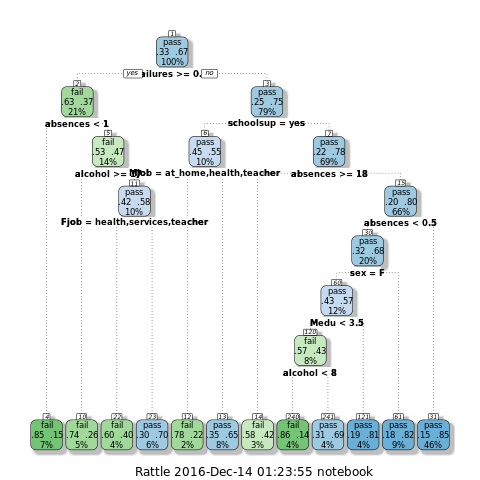

n= 395 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 395 130 pass (0.3291139 0.6708861)  
    2) failures>=0.5 83  31 fail (0.6265060 0.3734940)  
      4) absences< 1 26   4 fail (0.8461538 0.1538462) *
      5) absences>=1 57  27 fail (0.5263158 0.4736842)  
       10) alcohol>=17 19   5 fail (0.7368421 0.2631579) *
       11) alcohol< 17 38  16 pass (0.4210526 0.5789474)  
         22) Fjob=health,services,teacher 15   6 fail (0.6000000 0.4000000) *
         23) Fjob=at_home,other 23   7 pass (0.3043478 0.6956522) *
    3) failures< 0.5 312  78 pass (0.2500000 0.7500000)  
      6) schoolsup=yes 40  18 pass (0.4500000 0.5500000)  
       12) Mjob=at_home,health,teacher 9   2 fail (0.7777778 0.2222222) *
       13) Mjob=other,services 31  11 pass (0.3548387 0.6451613) *
      7) schoolsup=no 272  60 pass (0.2205882 0.7794118)  
       14) absences>=17.5 12   5 fail (0.5833333 0.4166667) *
       15) absences< 17.5 260  53 pass (0.2038462 0.7961538)  

In [6]:
# Simple Decision Tree with all values
tree1 <- rpart(passed~sex+age+famsize+Pstatus+Medu+Fedu+Mjob+Fjob
            +traveltime+failures+schoolsup+famsup+romantic+famrel+freetime+absences+alcohol
            ,data= math, method="class")
# Plot a fancy and more informative tree
 fancyRpartPlot(tree1)
print(tree1)

#### 2.1.1.- Create the first tree decicion model
Let's see why failures and abscences has the weight they have.


  0   1   2   3 
312  50  17  16 

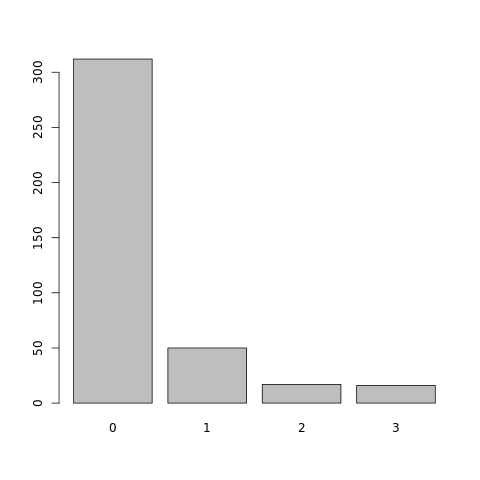

In [7]:
table(math$failures)
plot(factor(math$failures))


  0   1   2   3   4   5 
115   3  65   8  53   5 

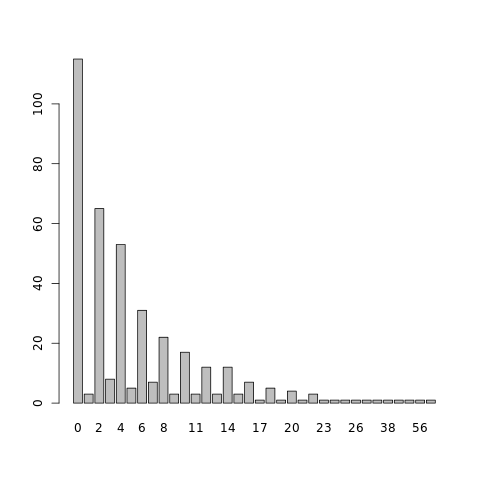

In [8]:
head(table(math$absences)) # just some samples
plot(factor(math$absences))

As we could see the behaviour from those student who has already failed at least once, is different from thew rest, since for them is needed to not assist at least one class to have a better chance to pass.

#### 2.2.- Compare our prediction model 
Against the real values from portuguese data set.

In [9]:
# Making a prediction based on previous Tree
prediction1 <- predict(tree1, port, type = "class")

# Calculating the error
err1 <- table(prediction1 == port$passed)
prop.table(err1)



    FALSE      TRUE 
0.2280431 0.7719569 

#### 2.3.- First conclusions
We reached **77%** of correctness from our initial model, but of course from the tree diagram we can suspect a case of overfitting here, so let's start a more exhaustive analysis.

### 3.- Analysis step by step

#### 3.1.- So, what's about alcohol? 
Lets make our first schema using only **alcohol** consumption and the number of **absences** (probably related).

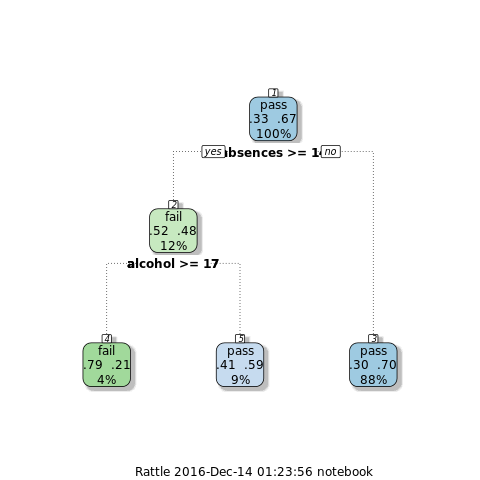

In [10]:
# Tree
tree2 <- rpart(passed~alcohol+absences, data= math, method="class")
# Plot
fancyRpartPlot(tree2)

The tree look pretty simple but lets check how good we've created our prediction:

In [11]:
# Prediction
prediction2 <- predict(tree2, port, type = "class")

# Error
diff2 <- table(prediction2 == port$passed)
prop.table(diff2)


    FALSE      TRUE 
0.1664099 0.8335901 

Not so bad, using only this two variables we've reached **83%** of accuracy.

#### 3.2.- What is the roll playing by parents here?
Let's build another schema using **parents** info this time.

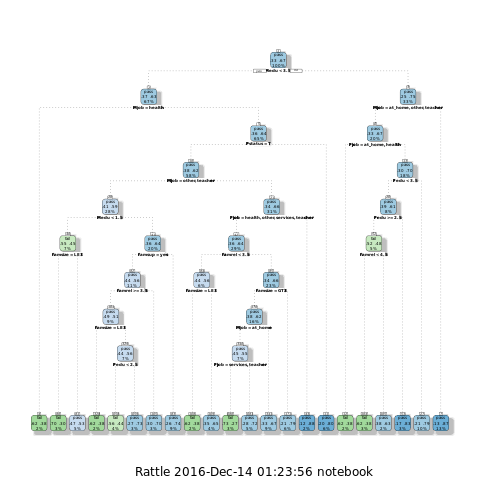

In [12]:
# Tree    
tree3 <- rpart(passed~famrel+famsize+Pstatus+Medu+Fedu+Mjob+Fjob
            +famsup+famrel,data= math, method="class",control=rpart.control(cp=0.005))
# Fancy plot
fancyRpartPlot(tree3)

Unfortunally using those attributes we only get a node and not a tree as error in plot states.
```{R}
Error in plot.rpart(tree3): fit is not a tree, just a root
```
After modify a bit the control of our partitioner (setting cp == 0.005) we were able to get a tree.

If we use **G3** value instead (tree above) we can generate a tree but if out of our scope its analysis, since we are only evaluating if student **passed** or not, so we need to move forward and keep looking for other relevant attributes.

From the manual of rpart
```
cp: complexity parameter.  Any split that does not decrease the overall lack of fit by a factor of ‘cp’ is not attempted. For instance, with ‘anova’ splitting, this means that the overall R-squared must increase by ‘cp’ at each step. The main role of this parameter is to save computing time by pruning off splits that are obviously not worthwhile.
```

In [13]:
# Prediction 
prediction3 <- predict(tree3, port, type = "class")

# Error
err3 <- table(prediction3 == port$passed)
prop.table(err3)


    FALSE      TRUE 
0.2881356 0.7118644 

And as expected this model does not given a good fit of our needs, so let's move on to another attributes.

#### 3.2.- All you need is love?
Let's see if this apply here, let's analyze **romantic** attribute also with **freetime**, **sex** and **age** values (probably related).

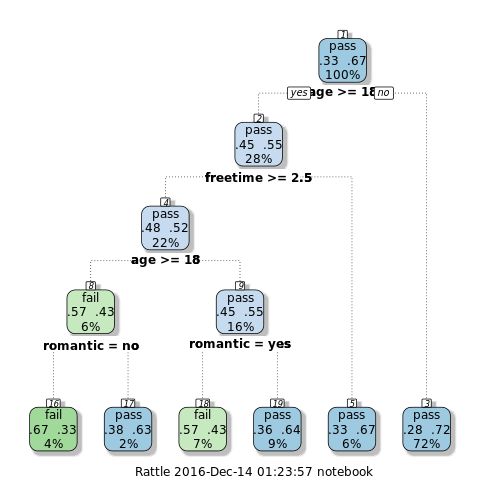

In [14]:
# Tree
tree4 <- rpart(passed~sex+age+romantic+freetime,data= math, method="class")
# Plot
fancyRpartPlot(tree4)

Well this tree looks a bit unbalanced, but lets the error says how well or bad we did it, using prediction again.

In [15]:
# Prediction
prediction4 <- predict(tree4, port, type = "class")

# Error
diff4 <- table(prediction4 == port$passed)
prop.table(diff4)


    FALSE      TRUE 
0.2064715 0.7935285 

Well it was a bit better than our first model for **2%**, reaching almost **80%** of correctness.

### 4.- A 'Clever' model

#### 4.1.- Relevant properties
As we saw in previous steps there a couple of factor which influence more, lets take those one and create a final tree. 

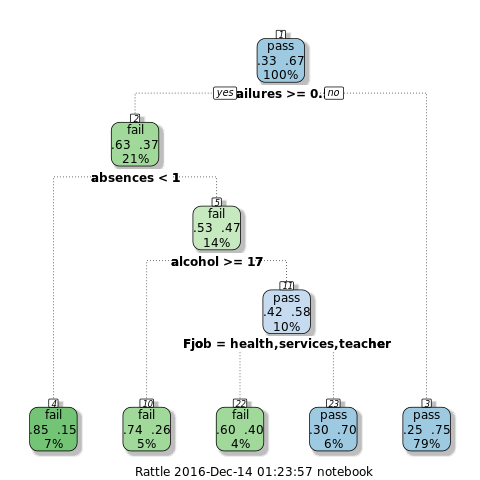

In [16]:
# Tree
tree5 <- rpart(passed~Mjob+Pstatus+Medu+Fjob+romantic+freetime+absences+alcohol+failures,data= math, method="class")
# Plot
fancyRpartPlot(tree5)

In [17]:
# Prediction
prediction5 <- predict(tree5, port, type = "class")
# Error
diff5 <- table(prediction5 == port$passed)
prop.table(diff5)


    FALSE      TRUE 
0.1587057 0.8412943 

#### 4.2.-  Less bether than none

After some reordering we were able to add a **1%** to our best prediction reaching **84%** of correct guesses.

### 5.- Conclusions

From this basic analysis we can make a few conclusions here:
* The main factor to determine the success of a student is its past, since people with previous **failures** tend to fail again. 
* Surprisingly  from student with previous failures and with **no absences** are more elegible to fail (sometimes [At least for them] is good to rest from school).
* Other dominant attributes are **alcohol** consumption and the **father's job**.

Must to be said that work with trees is not the best way to make predicitions, since usually they are built using greedy partitioning which as was proved many times could conduct us for not the best fit.

So in order to make more solid conclusions we need to include more advanced techniques of machine learning analysis.

### 6.- Future Work

Within the possibilities for future work are the following items:
* Use of **Random Forests** and other techniques of machine learning.
* Exchange data set and now train the model using portuguese data set and test it using math set.
* Use the full range of quaifycations for G3 instead of just passed or not valued.
* New analysis using **Local Data from local university**, and including parameters like *time consumed in social networks*, *previous year scores*, *etc.*

### 7.- Variable reduction
In order to create better predictions or trying to reproduce studies is very important to choose the correct parameters and features to use, but also optimize the data choosen, having lot of parameters can be do more difficult its analysis.
In this study we are using 33 features, but in the decision trees performed before we don't take in consideration all, so lets review some recommended formal techniques to improve the selection of variables to analyze.
It has been proved that a correct viarable reduction can improve the final results of the analysis.

The techniques chosen to try in this study are:
* Missing Values Ratio.
* Low Variance.
* High Correlation.
* Decision trees.
* Random Forest.

### 8.- Missing Values Ratio 

Sometimes data set information capturing can be limited by accesability to information, and not all samples have all information, in order to handle this is important to analyze if we have the enough data to perform our analysis.

Missing Values Ratio, sets that is recommendable not have  a missing values ratio more than 40-50% according the quantity of samles in total, if it is bigger this percentage is better to discart the feature.

#### 8.1.- Load original values

First we will need to load original values again since we alredy made a **NA** cleaning

In [18]:
# Load math and portuguese data sets with a new name
math_mv = read.table("student-mat.csv", sep=";", header=TRUE)
port_mv = read.table("student-por.csv", sep=";", header=TRUE)

#### 8.2.- Calculate missing values ratio for each column

To calculate the missing values ratio for each column we need to count the numbe of NA in each column divided by the expected size of the column.

In [19]:
setDT(math_mv)[, list(.N,unlist(.SD)), sex][, list(Count=sum(is.na(V2))/(.N+N[1])), sex]
setDT(math_mv)[, list(.N,unlist(.SD)), age][, list(Count=sum(is.na(V2))/(.N+N[1])), age]
setDT(math_mv)[, list(.N,unlist(.SD)), famsize][, list(Count=sum(is.na(V2))/(.N+N[1])), famsize]
setDT(math_mv)[, list(.N,unlist(.SD)), Pstatus][, list(Count=sum(is.na(V2))/(.N+N[1])), Pstatus]
setDT(math_mv)[, list(.N,unlist(.SD)), Fedu][, list(Count=sum(is.na(V2))/(.N+N[1])), Fedu]
setDT(math_mv)[, list(.N,unlist(.SD)), Mjob][, list(Count=sum(is.na(V2))/(.N+N[1])), Mjob]
setDT(math_mv)[, list(.N,unlist(.SD)), Fjob][, list(Count=sum(is.na(V2))/(.N+N[1])), Fjob]
setDT(math_mv)[, list(.N,unlist(.SD)), traveltime][, list(Count=sum(is.na(V2))/(.N+N[1])), traveltime]
setDT(math_mv)[, list(.N,unlist(.SD)), failures][, list(Count=sum(is.na(V2))/(.N+N[1])), failures]
setDT(math_mv)[, list(.N,unlist(.SD)), famsup][, list(Count=sum(is.na(V2))/(.N+N[1])), famsup]
setDT(math_mv)[, list(.N,unlist(.SD)), schoolsup][, list(Count=sum(is.na(V2))/(.N+N[1])), schoolsup]
setDT(math_mv)[, list(.N,unlist(.SD)), romantic][, list(Count=sum(is.na(V2))/(.N+N[1])), romantic]
setDT(math_mv)[, list(.N,unlist(.SD)), famrel][, list(Count=sum(is.na(V2))/(.N+N[1])), famrel]
setDT(math_mv)[, list(.N,unlist(.SD)), freetime][, list(Count=sum(is.na(V2))/(.N+N[1])), freetime]
setDT(math_mv)[, list(.N,unlist(.SD)), absences][, list(Count=sum(is.na(V2))/(.N+N[1])), absences]
setDT(math_mv)[, list(.N,unlist(.SD)), Dalc][, list(Count=sum(is.na(V2))/(.N+N[1])), Dalc]
setDT(math_mv)[, list(.N,unlist(.SD)), Walc][, list(Count=sum(is.na(V2))/(.N+N[1])), Walc]

   sex Count
1:   F     0
2:   M     0

   age Count
1:  18     0
2:  17     0
3:  15     0
4:  16     0
5:  19     0
6:  22     0
7:  20     0
8:  21     0

   famsize Count
1:     GT3     0
2:     LE3     0

   Pstatus Count
1:       A     0
2:       T     0

   Fedu Count
1:    4     0
2:    1     0
3:    2     0
4:    3     0
5:    0     0

       Mjob Count
1:  at_home     0
2:   health     0
3:    other     0
4: services     0
5:  teacher     0

       Fjob Count
1:  teacher     0
2:    other     0
3: services     0
4:   health     0
5:  at_home     0

   traveltime Count
1:          2     0
2:          1     0
3:          3     0
4:          4     0

   failures Count
1:        0     0
2:        3     0
3:        2     0
4:        1     0

   famsup Count
1:     no     0
2:    yes     0

   schoolsup Count
1:       yes     0
2:        no     0

   romantic Count
1:       no     0
2:      yes     0

   famrel Count
1:      4     0
2:      5     0
3:      3     0
4:      1     0
5:      2     0

   freetime Count
1:        3     0
2:        2     0
3:        4     0
4:        1     0
5:        5     0

    absences Count
 1:        6     0
 2:        4     0
 3:       10     0
 4:        2     0
 5:        0     0
 6:       16     0
 7:       14     0
 8:        7     0
 9:        8     0
10:       25     0
11:       12     0
12:       54     0
13:       18     0
14:       26     0
15:       20     0
16:       56     0
17:       24     0
18:       28     0
19:        5     0
20:       13     0
21:       15     0
22:       22     0
23:        3     0
24:       21     0
25:        1     0
26:       75     0
27:       30     0
28:       19     0
29:        9     0
30:       11     0
31:       38     0
32:       40     0
33:       23     0
34:       17     0
    absences Count

   Dalc Count
1:    1     0
2:    2     0
3:    5     0
4:    3     0
5:    4     0

   Walc Count
1:    1     0
2:    3     0
3:    2     0
4:    4     0
5:    5     0

#### 8.3.- Missing Value ratio conclusion
As part of our data set, we can say that have verified it is very well prepared since missing value ratio for all features was 0%, meaning all data is complete so we can continue using them.

As part of the technique it wont help us to know which features are good to ask, but once we got data, what features have enough information to be used.

### 9.- Low variance

data columns with little changes in the data carry little information. Thus all data columns with variance lower than a given threshold are removed. A word of caution: variance is range dependent; therefore normalization is required before applying this technique.

#### 9.1.- Loading needed librarys
R programming offers some libraries for data analysis, caret is a very useful library that provides a lot of functions related to variable reduction
* library(caret)
* library(lattice)
* library(ggplot2)

#### 9.2.- Calculate data variace parameters

Let's use the function nearZeroVar function which will get the main data variance parameters 

In [20]:
x = nearZeroVar(math_mv, saveMetrics = TRUE)
x
y = nearZeroVar(port_mv, saveMetrics = TRUE)
y

           freqRatio percentUnique zeroVar   nzv
school      7.586957     0.5063291   FALSE FALSE
sex         1.112299     0.5063291   FALSE FALSE
age         1.061224     2.0253165   FALSE FALSE
address     3.488636     0.5063291   FALSE FALSE
famsize     2.464912     0.5063291   FALSE FALSE
Pstatus     8.634146     0.5063291   FALSE FALSE
Medu        1.271845     1.2658228   FALSE FALSE
Fedu        1.150000     1.2658228   FALSE FALSE
Mjob        1.368932     1.2658228   FALSE FALSE
Fjob        1.954955     1.2658228   FALSE FALSE
reason      1.330275     1.0126582   FALSE FALSE
guardian    3.033333     0.7594937   FALSE FALSE
traveltime  2.401869     1.0126582   FALSE FALSE
studytime   1.885714     1.0126582   FALSE FALSE
failures    6.240000     1.0126582   FALSE FALSE
schoolsup   6.745098     0.5063291   FALSE FALSE
famsup      1.581699     0.5063291   FALSE FALSE
paid        1.182320     0.5063291   FALSE FALSE
activities  1.036082     0.5063291   FALSE FALSE
nursery     3.876543

           freqRatio percentUnique zeroVar   nzv
school      1.871681     0.3081664   FALSE FALSE
sex         1.439850     0.3081664   FALSE FALSE
age         1.011299     1.2326656   FALSE FALSE
address     2.294416     0.3081664   FALSE FALSE
famsize     2.380208     0.3081664   FALSE FALSE
Pstatus     7.112500     0.3081664   FALSE FALSE
Medu        1.062857     0.7704160   FALSE FALSE
Fedu        1.201149     0.7704160   FALSE FALSE
Mjob        1.897059     0.7704160   FALSE FALSE
Fjob        2.027624     0.7704160   FALSE FALSE
reason      1.912752     0.6163328   FALSE FALSE
guardian    2.973856     0.4622496   FALSE FALSE
traveltime  1.718310     0.6163328   FALSE FALSE
studytime   1.438679     0.6163328   FALSE FALSE
failures    7.842857     0.6163328   FALSE FALSE
schoolsup   8.544118     0.3081664   FALSE FALSE
famsup      1.585657     0.3081664   FALSE FALSE
paid       15.641026     0.3081664   FALSE FALSE
activities  1.060317     0.3081664   FALSE FALSE
nursery     4.070312

#### 9.3.- Analyzing Near Zero Variance results
Results in table can be readable in next way, freqRatio means how frequent any value is repeated across the samples, it is recomended features to have a freq ratio less than **15%**.

Other parameter is the percentUnique, which tells the percentage of unique values across the samples, it is recommended to be higher than **10%**, but checking out values most of them have a very low range of values so it could be understandable that all are less than **10%**.

Finally according more rules, function does a clasification decision about if predictors are constant (ZeroVar) or if predictors are close to be constant (nzv).

#### 9.4.- Analyzing NZV conclusion
As part of our data set, we can see that even when some parameters doesn't pass the recommended thresholds the function automatically declares all features as non near zero variance, as meaning that more considerations should be done, however is goog to reduce variables but we want to be sure which ones and not reduce more than needed, decide to keep all features.

More than reduce or not the variables, it is a good information know how much the data variace is across samples.

### 10.- High correlation

Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model. Pairs of columns with correlation coefficient higher than a threshold are reduced to only one. A word of caution: correlation is scale sensitive; therefore column normalization is required for a meaningful correlation comparison.

In this case correlation cna also help us as guide to know how we can relate information, in this case using math grades to train and portuguese grades to evaluate. Also how to treat partial grades for **G1**, **G2** and **G3**.

#### 10.1.- Getting averages to compare with partial grades
First lets check correlation of grades between partials from same subjects, so first lets calculate it.

In [21]:
math_avg = (math$G1 + math$G2 + math$G3)/3
port_avg = (port$G1 + port$G2 + port$G3)/3

#### 10.2.- Calculating correlation using Pearson coeficent

let's calculate correlation first between partial grades and average and them across subjets first using Pearson coeficent.

In [22]:
# calculate correlation matrix between math partials
cor(math$G1, math$G2, use = "everything", method = "pearson")
cor(math$G1, math$G3, use = "everything", method = "pearson")
cor(math$G2, math$G3, use = "everything", method = "pearson")

# calculate correlation matrix math partials vs average
cor(math_avg, math$G1, use = "everything", method = "pearson")
cor(math_avg, math$G2, use = "everything", method = "pearson")
cor(math_avg, math$G3, use = "everything", method = "pearson")

# calculate correlation matrix between portuguese partials
cor(port$G1, port$G2, use = "everything", method = "pearson")
cor(port$G1, port$G3, use = "everything", method = "pearson")
cor(port$G2, port$G3, use = "everything", method = "pearson")

# calculate correlation matrix portuguese partials vs average
cor(port_avg, port$G1, use = "everything", method = "pearson")
cor(port_avg, port$G2, use = "everything", method = "pearson")
cor(port_avg, port$G3, use = "everything", method = "pearson")

# calculate correlation matrix portuguese vs math
cor(port$G1[0:394], math$G2[0:394], use = "everything", method = "pearson")
cor(port$G1[0:394], math$G3[0:394], use = "everything", method = "pearson")
cor(port$G2[0:394], math$G3[0:394], use = "everything", method = "pearson")
cor(port_avg[0:394], math_avg[0:394], use = "everything", method = "pearson")

[1] 0.8521181

[1] 0.8014679

[1] 0.904868

[1] 0.9193861

[1] 0.9679987

[1] 0.9598732

[1] 0.8649816

[1] 0.8263871

[1] 0.918548

[1] 0.9335537

[1] 0.9712561

[1] 0.9618291

[1] 0.2576116

[1] 0.2311811

[1] 0.2575389

[1] 0.3015212

#### 10.3.- Calculating correlation using Kendall coeficent

let's calculate correlation first between partial grades and average and them across subjets first using Kendall coeficent.

In [23]:
# calculate correlation matrix between math partials
cor(math$G1, math$G2, use = "everything", method = "kendall")
cor(math$G1, math$G3, use = "everything", method = "kendall")
cor(math$G2, math$G3, use = "everything", method = "kendall")

# calculate correlation matrix math partials vs average
cor(math_avg, math$G1, use = "everything", method = "kendall")
cor(math_avg, math$G2, use = "everything", method = "kendall")
cor(math_avg, math$G3, use = "everything", method = "kendall")

# calculate correlation matrix between portuguese partials
cor(port$G1, port$G2, use = "everything", method = "kendall")
cor(port$G1, port$G3, use = "everything", method = "kendall")
cor(port$G2, port$G3, use = "everything", method = "kendall")

# calculate correlation matrix portuguese partials vs average
cor(port_avg, port$G1, use = "everything", method = "kendall")
cor(port_avg, port$G2, use = "everything", method = "kendall")
cor(port_avg, port$G3, use = "everything", method = "kendall")

# calculate correlation matrix portuguese vs math
cor(port$G1[0:394], math$G2[0:394], use = "everything", method = "kendall")
cor(port$G1[0:394], math$G3[0:394], use = "everything", method = "kendall")
cor(port$G2[0:394], math$G3[0:394], use = "everything", method = "kendall")
cor(port_avg[0:394], math_avg[0:394], use = "everything", method = "kendall")

[1] 0.7734594

[1] 0.7463426

[1] 0.8835184

[1] 0.8327781

[1] 0.9096158

[1] 0.917078

[1] 0.7806392

[1] 0.7661978

[1] 0.8695948

[1] 0.8616952

[1] 0.908808

[1] 0.9064493

[1] 0.2091468

[1] 0.2068991

[1] 0.2338031

[1] 0.2241178

#### 10.4.- Calculating correlation using Spearman coeficent

let's calculate correlation first between partial grades and average and them across subjets first using Spearman coeficent.

In [24]:
# calculate correlation matrix between math partials
cor(math$G1, math$G2, use = "everything", method = "spearman")
cor(math$G1, math$G3, use = "everything", method = "spearman")
cor(math$G2, math$G3, use = "everything", method = "spearman")

# calculate correlation matrix math partials vs average
cor(math_avg, math$G1, use = "everything", method = "spearman")
cor(math_avg, math$G2, use = "everything", method = "spearman")
cor(math_avg, math$G3, use = "everything", method = "spearman")

# calculate correlation matrix between portuguese partials
cor(port$G1, port$G2, use = "everything", method = "spearman")
cor(port$G1, port$G3, use = "everything", method = "spearman")
cor(port$G2, port$G3, use = "everything", method = "spearman")

# calculate correlation matrix portuguese partials vs average
cor(port_avg, port$G1, use = "everything", method = "spearman")
cor(port_avg, port$G2, use = "everything", method = "spearman")
cor(port_avg, port$G3, use = "everything", method = "spearman")

# calculate correlation matrix portuguese vs math
cor(port$G1[0:394], math$G2[0:394], use = "everything", method = "spearman")
cor(port$G1[0:394], math$G3[0:394], use = "everything", method = "spearman")
cor(port$G2[0:394], math$G3[0:394], use = "everything", method = "spearman")
cor(port_avg[0:394], math_avg[0:394], use = "everything", method = "spearman")

[1] 0.8947916

[1] 0.8780013

[1] 0.9571253

[1] 0.9393386

[1] 0.9764715

[1] 0.9808164

[1] 0.8930649

[1] 0.8832876

[1] 0.9444512

[1] 0.9543438

[1] 0.9736526

[1] 0.9729766

[1] 0.2808537

[1] 0.2763435

[1] 0.30924

[1] 0.3179563

#### 10.5.- Correlation conclusions
Seeing results using cor function we can see that spearman coeficent got the higher percentage of correlation, and kendall gets the lower but difference is in a range of 10%.

According values gotten there are big correlation between partial grades and more correlation between each partial with average grades for both subjects. 

But when we compare math grades vs portuguse grades the correlation value is not greater than 35%. Printing out matrix we can obviously see that math grades are significally less than portuguese ones for all students, this is causing this change in correlation.

However in this paper: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.540.8151&rep=rep1&type=pdf author clasifies grades in groups where it is identified that in most of cases the classification in math corresponds in portuguese, so this confirm as a good experiment the decision of using math grades to predict portuguese ones.

### 11.- Decision trees

Early in this study we used decision trees as predictors, but also we were playing with different variables looking the ones more useful, and even in the most overfitting trees not all variables were present, so it can be an easy tool to get idea which variants can be useful.

However there are difference between data scientist point of views. since some ones just consider them as a part of the random forest technique we will see next.

### 12.- Random Forests

As a continuation of previous steps we continued our analysis this time using random forests

#### 12.0.1.- Initialize the randomness
Just in order to keep the results equals trough the multiple iterations of this work

In [25]:
# Value inside does not matter just to keep consistency
set.seed(444)

#### 12.1 Initial random forests

So lets started using basic random forest with all values

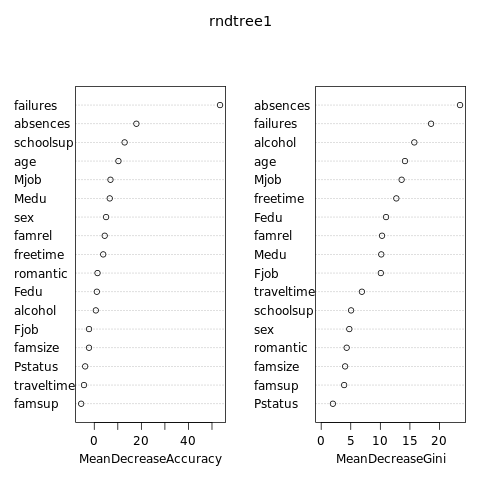

In [26]:
# Simple Random forest with all values
rndtree1 <- randomForest(as.factor(passed) ~ sex + age + famsize + Pstatus + Medu 
            + Fedu + Mjob + Fjob + traveltime + failures + schoolsup
            + famsup + romantic + famrel + freetime + absences + alcohol
            ,data = math, importance=TRUE, ntree=2000)
varImpPlot(rndtree1)

In [27]:
# Prediction
rfpred1 <- predict(rndtree1, port, type = "class")
# Error
rferr1 <- table(rfpred1 == port$passed)
prop.table(rferr1)


    FALSE      TRUE 
0.2357473 0.7642527 

Actually it was not the best prediction we made so far (**76%** vs **84%**), but as we will see in the next step, it could be improved.

#### 12.2.- Forest of Conditional Inference Trees

Lets's use another type of trees for our forests and see what happens

In [28]:
# Simple Conditional Forests with all values
rndtree2 <- cforest(as.factor(passed) ~ sex + age + famsize + Pstatus + Medu 
            + Fedu + Mjob + Fjob + traveltime + failures + schoolsup
            + famsup + romantic + famrel + freetime + absences + alcohol
            ,data = math, controls=cforest_unbiased(ntree=2000, mtry=5))

# Prediction
rfpred2 <- predict(rndtree2, port, OOB=TRUE, type = "response")

# Error
rferr2 <- table(rfpred2 == port$passed)
prop.table(rferr2)


    FALSE      TRUE 
0.1432974 0.8567026 

And we did it again, we improve our guesses by **1%** to get a total of **85.5%** now we can disccard or to add some other more variants to try to increase this indicators. 

#### 12.3.- Yet Another Random Forest
Lets use only the relevant variables we found in the step **4**, and see if using less variables increases our chance to be correct.

In [29]:
# Simple Conditional Forests with all values
rndtree3 <- cforest(as.factor(passed) ~ Mjob + Pstatus + Medu + 
             Fjob + romantic + freetime + absences + alcohol + failures
            ,data = math, controls=cforest_unbiased(ntree=2000, mtry=5))

# Prediction
rfpred3 <- predict(rndtree3, port, OOB=TRUE, type = "response")

# Error
rferr3 <- table(rfpred3 == port$passed)
prop.table(rferr3)


    FALSE      TRUE 
0.1386749 0.8613251 

Well the result varies from **85.8%** to **86%** which is in general a slightly better but not by far. So let's use the top 5 of relevant values from point **7.0**

In [30]:
# Simple Conditional Forests with all values
rndtree4 <- cforest(as.factor(passed) ~ failures + absences + schoolsup + alcohol + age
            ,data = math, controls=cforest_unbiased(ntree=2000, mtry=3))

# Prediction
rfpred4 <- predict(rndtree4, port, OOB=TRUE, type = "response")

# Error
rferr4 <- table(rfpred4 == port$passed)
prop.table(rferr4)


    FALSE      TRUE 
0.1432974 0.8567026 

We had to decrease the number of **mtry = 3**, since it is related to the numbers of variables used to created the trees, nevertheless our prediction does not improve as we wished, and it remains in **85%**.

#### 12.4.- Random Forest Conlusions

We could increase our chance to win with predictions using random forests, but still not reach a better index of 
success, but we need to remember that we are training our model using one subject and use it in another one, so there 
is one factor which is missing, and is the difficult of subject itself, so after that our result seen very acceptable.
